In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# Importing dataset
url = "https://raw.githubusercontent.com/srikrishna719/cricket-dataset/main/ipl_data.csv"
ipl_df = pd.read_csv(url)
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (76014, 15)


# Exploratory Data Analysis

In [2]:
# First 5 Columns Data
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# Describing the ipl_dfset
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [4]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
# Number of Unique Values in each column
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [6]:
# ipl_df types of all Columns
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

<Figure size 500x300 with 0 Axes>

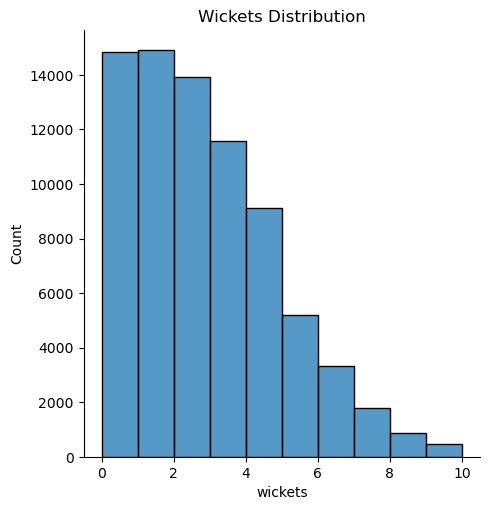

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a smaller figure size
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed

# Plot the wickets distribution
sns.displot(ipl_df['wickets'], kde=False, bins=10)

# Add a title
plt.title("Wickets Distribution")

# Show the plot
plt.show()


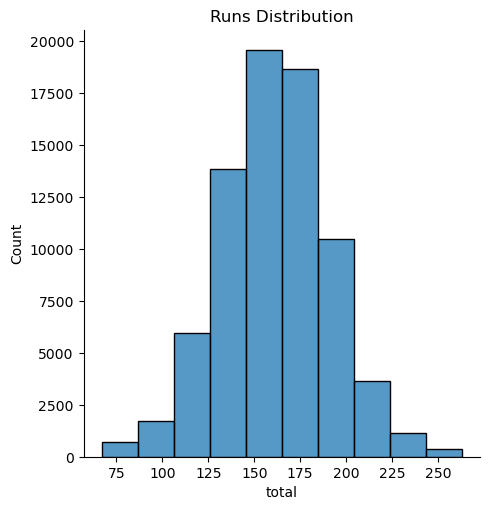

In [8]:
#Runs Distribution
sns.displot(ipl_df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

# Data Cleaning

### Removing Irrelevant Data columns

In [9]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

#### Here, we can see that columns ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'] won't provide any relevant information for our model to train

In [10]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### Keeping only Consistent Teams

In [11]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [12]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### Remove First 5 Overs of every match

In [13]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


### Plotting a Correlation Matrix of current data

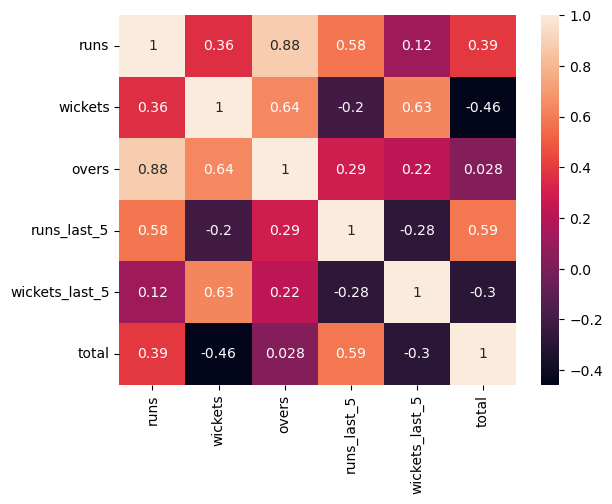

In [14]:
sns.heatmap(data=ipl_df.corr(), annot=True)
plt.show()

# Data Preprocessing and Encoding

### Performing Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


### Performing One Hot Encoding and Column Transformation

In [16]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

### Save the Numpy Array in a new DataFrame with transformed columns

In [17]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

In [18]:
# Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

### Prepare Train and Test Data

In [19]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [20]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


# ML Algorithms

In [21]:
models = dict()

### 1. Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [23]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.99%
Test Score : 86.20%


In [24]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.806781351283969
Mean Squared Error (MSE): 122.30721765145849
Root Mean Squared Error (RMSE): 11.059259362699587


### 2.Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [26]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.90%
Test Score : 65.99%


In [27]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.029043196226032
Mean Squared Error (MSE): 301.4725384894365
Root Mean Squared Error (RMSE): 17.362964565114925


### 3.Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [29]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.08%
Test Score : 93.54%


In [30]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.3848748130142114
Mean Squared Error (MSE): 57.20557700261521
Root Mean Squared Error (RMSE): 7.563436851234709


### 4.Support Vector Machine

In [31]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [32]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm

Train Score : 57.49%
Test Score : 57.39%


In [33]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.702697604147868
Mean Squared Error (MSE): 377.65833657403687
Root Mean Squared Error (RMSE): 19.43343347363087


### 5.XGBoost

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
import numpy as np

xgb = XGBRegressor()

# Train the model
xgb.fit(train_features, train_labels)

# Calculate and print the training and test scores
train_score_xgb = xgb.score(train_features, train_labels) * 100
test_score_xgb = xgb.score(test_features, test_labels) * 100
print(f'Train Score: {train_score_xgb:.5f}%\nTest Score: {test_score_xgb:.5f}%')

# Store the test score in the 'models' dictionary
models["xgb"] = test_score_xgb

# Model Evaluation
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))


Train Score: 88.62088%
Test Score: 84.48112%
---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.443984915448732
Mean Squared Error (MSE): 137.56455159010792
Root Mean Squared Error (RMSE): 11.72879156563488


### 6.KNeighborsRegressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [36]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 86.65%
Test Score : 78.31%


In [37]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 9.68112690102219
Mean Squared Error (MSE): 192.2487958115183
Root Mean Squared Error (RMSE): 13.865381199646777


# Best Model

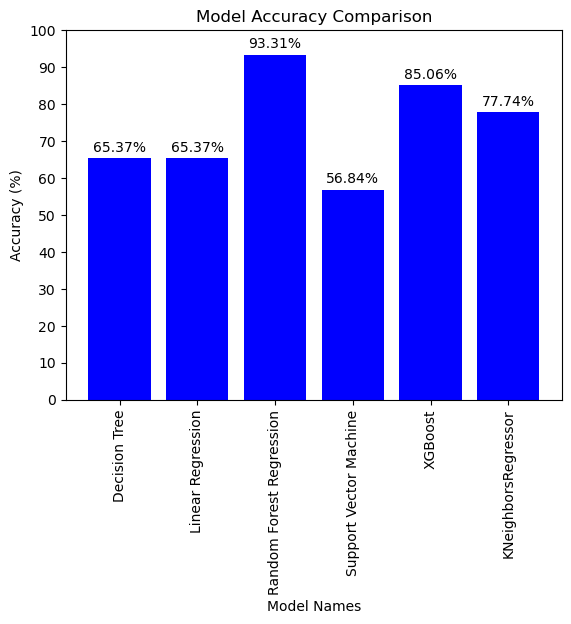

In [38]:
import matplotlib.pyplot as plt

# Sample data for model names and accuracy scores
models = {
    "Decision Tree": 65.37,
    "Linear Regression": 65.37,
    "Random Forest Regression": 93.31,
    "Support Vector Machine": 56.84,
    "XGBoost": 85.06414,
    "KNeighborsRegressor": 77.74,
}

# Extracting model names and accuracy values
model_names = list(models.keys())
accuracy = list(models.values())

# Creating the bar plot
plt.bar(model_names, accuracy, color='blue')
plt.xlabel('Model Names')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Set the y-axis limit to represent percentage

# Set y-axis ticks to represent percentages directly
plt.yticks(range(0, 101, 10))

# Display the values on top of the bars
for i in range(len(model_names)):
    plt.text(i, accuracy[i] + 1, f'{accuracy[i]:.2f}%', ha='center', va='bottom')
    
# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

plt.show()


### From above, we can see that Random Forest performed the best, closely followed by Decision Tree and KNR. So we will be choosing Random Forest for the final model

# Predictions

In [39]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

## Test 1
### Batting Team : Delhi Daredevils
### Bowling Team : Chennai Super Kings
### Final Score : 147/9

In [40]:
batting_team = 'Chennai Super Kings'
bowling_team = 'Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=20, runs=149, wickets=9, runs_last_5=4, wickets_last_5=3)
print(f'Predicted Score: {score}')

Predicted Score: 151


C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 1
### Batting Team : Mumbai Indians
### Bowling Team : Kings XI Punjab
### Final Score : 176/7

In [41]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 186 || Actual Score : 176


C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 2
### Batting Team : Kings XI Punjab
### Bowling Team : Rajasthan Royals
### Final Score : 185/4

In [42]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 178 || Actual Score : 185


C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 4
### Batting Team : Kolkata Knight Riders
### Bowling Team : Chennai Super Kings
### Final Score : 172/5

In [43]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 174 || Actual Score : 172


C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 5
### Batting Team : Delhi Daredevils
### Bowling Team : Mumbai Indians
### Final Score : 110/7

In [44]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 107 || Actual Score : 110


C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 6
### Batting Team : Kings XI Punjab
### Bowling Team : Chennai Super Kings
### Final Score : 153/9

In [45]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 148 || Actual Score : 153


C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 7
### Batting Team : Sunrisers Hyderabad
### Bowling Team : Royal Challengers Banglore
### Final Score : 146/10

In [46]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 153 || Actual Score : 146


C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
import pandas as pd

# Replace these values with your actual evaluation results
model_names = ['Decision Tree', 'Linear Regression', 'Random Forest', 'Support Vector', 'XGB Regression', 'KNR']
mae_values = [3.96, 13.21, 4.54, 14.83, 8.40, 9.85]
mse_values = [124.42, 312.28, 60.30, 389.12, 134.69, 200.69]
rmse_values = [11.15, 17.67, 7.77, 19.73, 11.61, 14.17]

# Create a DataFrame
df_evaluation = pd.DataFrame({
    'Model': model_names,
    'Mean Absolute Error': mae_values,
    'Mean Squared Error': mse_values,
    'Root Mean Squared Error': rmse_values
})

# Display the DataFrame
print(df_evaluation)


               Model  Mean Absolute Error  Mean Squared Error  \
0      Decision Tree                 3.96              124.42   
1  Linear Regression                13.21              312.28   
2      Random Forest                 4.54               60.30   
3     Support Vector                14.83              389.12   
4     XGB Regression                 8.40              134.69   
5                KNR                 9.85              200.69   

   Root Mean Squared Error  
0                    11.15  
1                    17.67  
2                     7.77  
3                    19.73  
4                    11.61  
5                    14.17  


In [48]:
import pandas as pd

# Replace these values with your actual evaluation results
model_names = ['Decision Tree', 'Linear Regression', 'Random Forest', 'Support Vector', 'XGB Regression', 'KNR']
mae_values = [3.96, 13.21, 4.54, 14.83, 8.40, 9.85]
mse_values = [124.42, 312.28, 60.30, 389.12, 134.69, 200.69]
rmse_values = [11.15, 17.67, 7.77, 19.73, 11.61, 14.17]

# Create a DataFrame
df_evaluation = pd.DataFrame({
    'Model': model_names,
    'Mean Absolute Error': mae_values,
    'Mean Squared Error': mse_values,
    'Root Mean Squared Error': rmse_values
})

# Display the DataFrame
print(df_evaluation.to_markdown(index=False))


| Model             |   Mean Absolute Error |   Mean Squared Error |   Root Mean Squared Error |
|:------------------|----------------------:|---------------------:|--------------------------:|
| Decision Tree     |                  3.96 |               124.42 |                     11.15 |
| Linear Regression |                 13.21 |               312.28 |                     17.67 |
| Random Forest     |                  4.54 |                60.3  |                      7.77 |
| Support Vector    |                 14.83 |               389.12 |                     19.73 |
| XGB Regression    |                  8.4  |               134.69 |                     11.61 |
| KNR               |                  9.85 |               200.69 |                     14.17 |


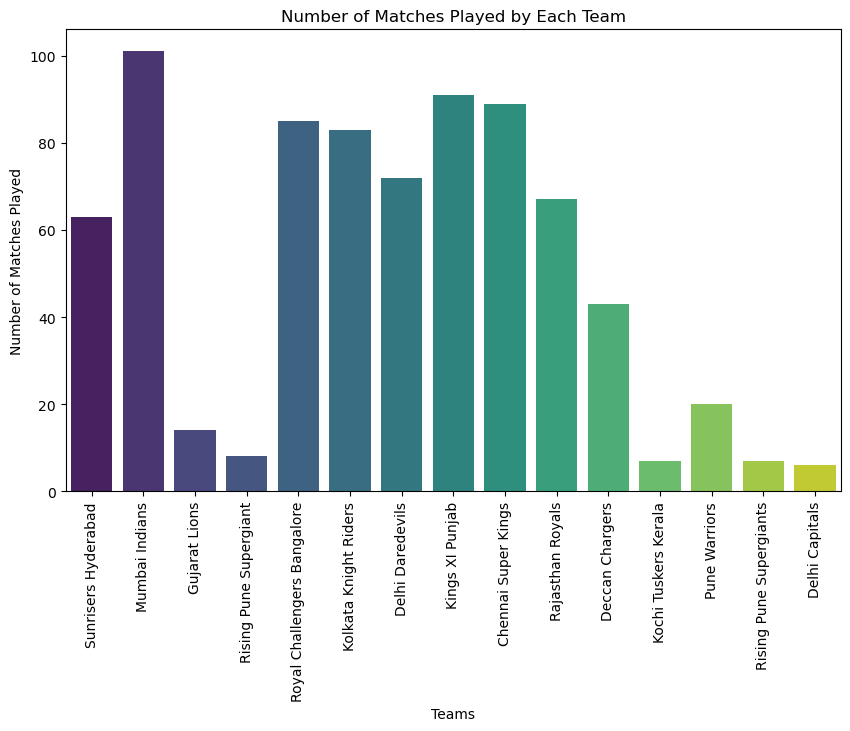

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
data = pd.read_csv("C:/Users/Sri Krishna/Desktop/VIT/SEM1/SET/matches.csv")
# Visualization 1: Team Performance
plt.figure(figsize=(10, 6))
sns.countplot(x='team1', data=data, palette='viridis')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Played')
plt.title('Number of Matches Played by Each Team')
plt.xticks(rotation=90)
plt.show()

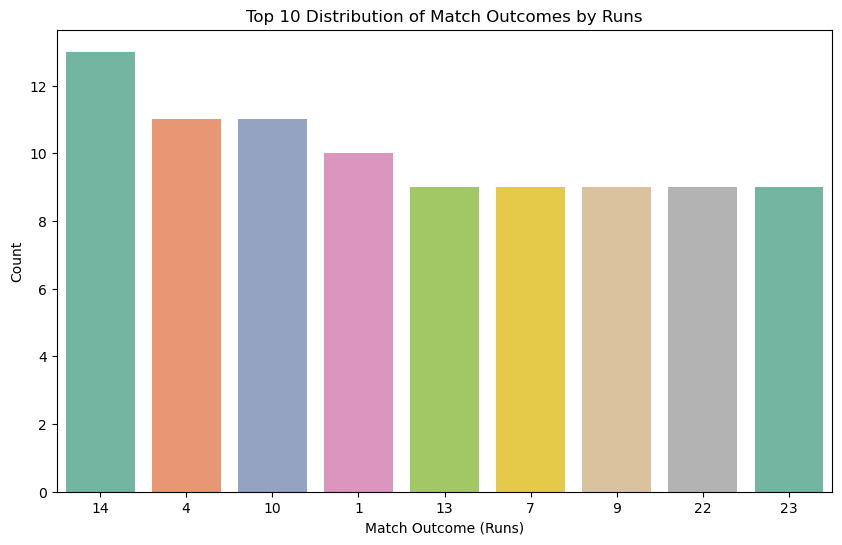

In [54]:
# Visualization 2: Top 10 Match Outcomes by Runs
plt.figure(figsize=(10, 6))
sns.countplot(x='win_by_runs', data=data, palette='Set2', order=data['win_by_runs'].value_counts().index[1:10])
plt.xlabel('Match Outcome (Runs)')
plt.ylabel('Count')
plt.title('Top 10 Distribution of Match Outcomes by Runs')
plt.show()

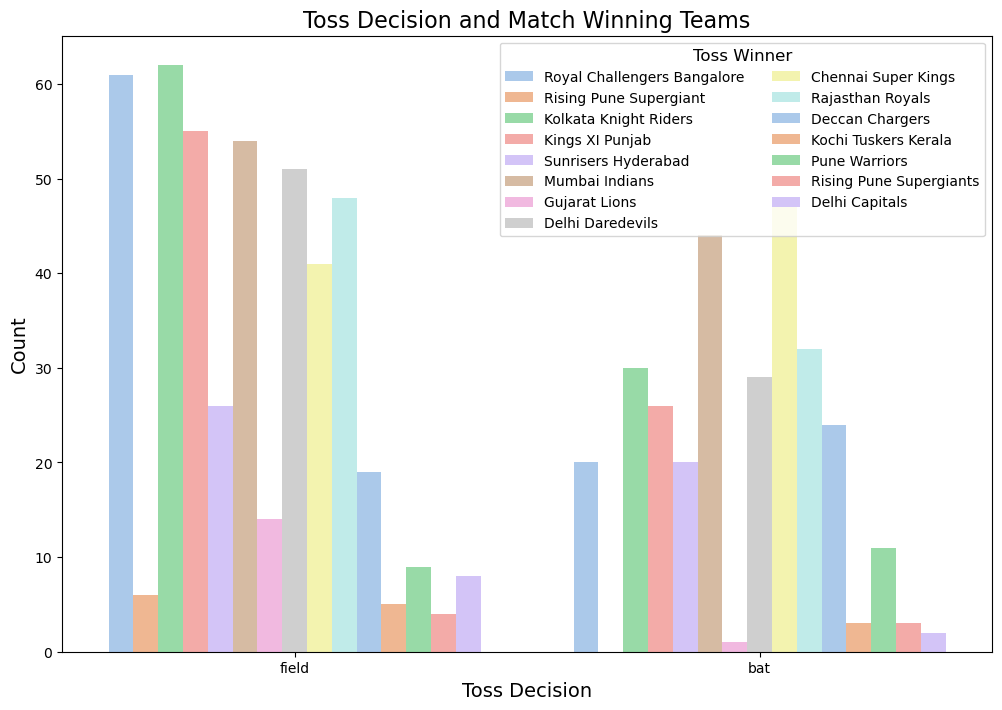

In [55]:
# Visualization 3: Toss Analysis
plt.figure(figsize=(12, 8))
sns.countplot(x='toss_decision', data=data, hue='toss_winner', palette='pastel')
plt.xlabel('Toss Decision', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Toss Decision and Match Winning Teams', fontsize=16)
plt.legend(title='Toss Winner', title_fontsize='12', loc='upper right', ncol=2)
plt.show()

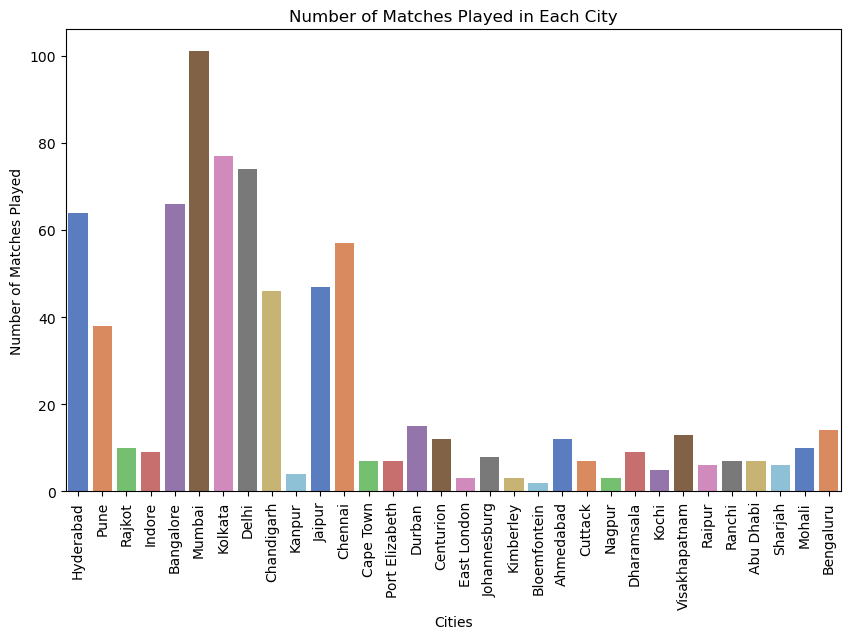

In [56]:

# Visualization 4: City-wise Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=data, palette='muted')
plt.xlabel('Cities')
plt.ylabel('Number of Matches Played')
plt.title('Number of Matches Played in Each City')
plt.xticks(rotation=90)
plt.show()

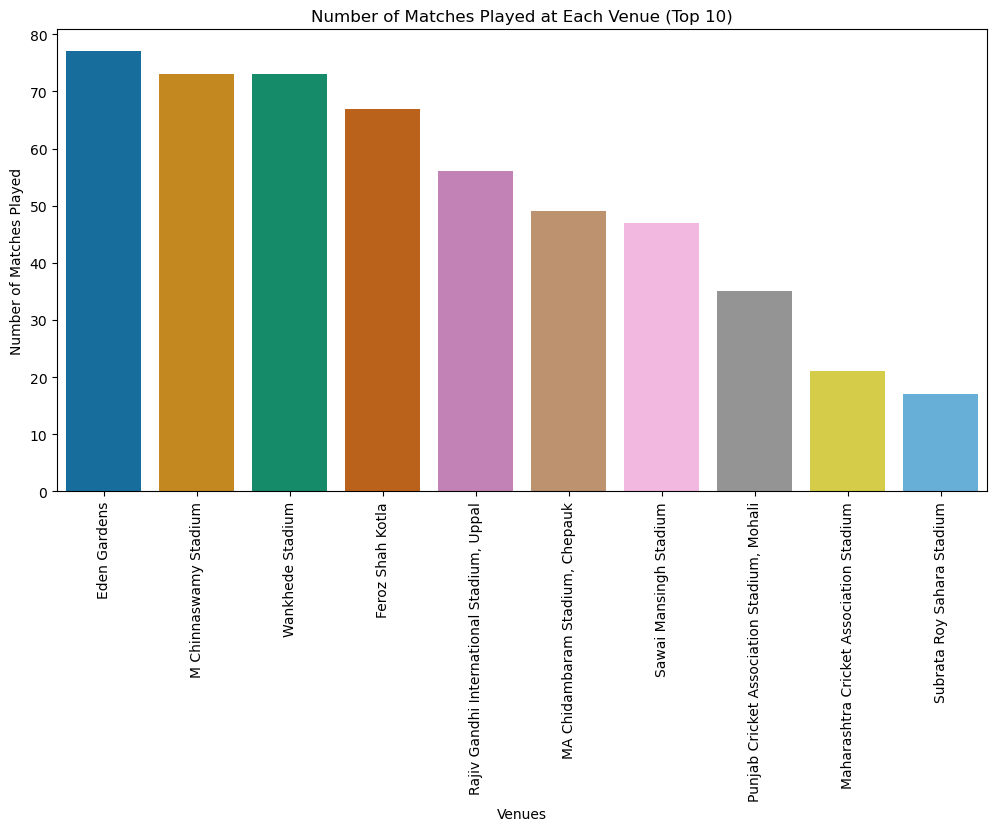

In [57]:
# Visualization 5: Venue Analysis (Top 10)
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=data, palette='colorblind', order=data['venue'].value_counts().index[:10])
plt.xlabel('Venues')
plt.ylabel('Number of Matches Played')
plt.title('Number of Matches Played at Each Venue (Top 10)')
plt.xticks(rotation=90)
plt.show()

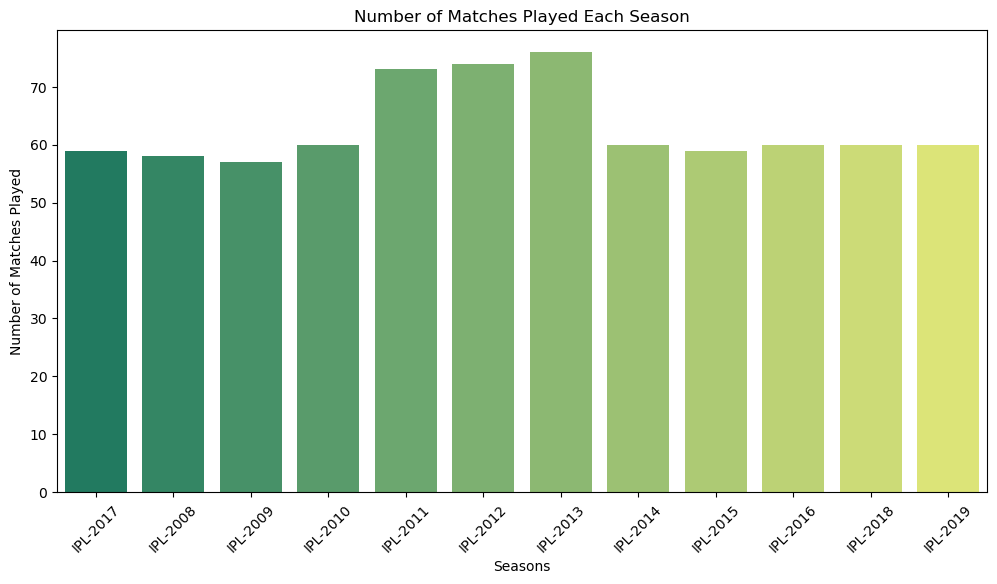

In [58]:
# Visualization 7: Time Series Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', data=data, palette='summer')
plt.xlabel('Seasons')
plt.ylabel('Number of Matches Played')
plt.title('Number of Matches Played Each Season')
plt.xticks(rotation=45)
plt.show()

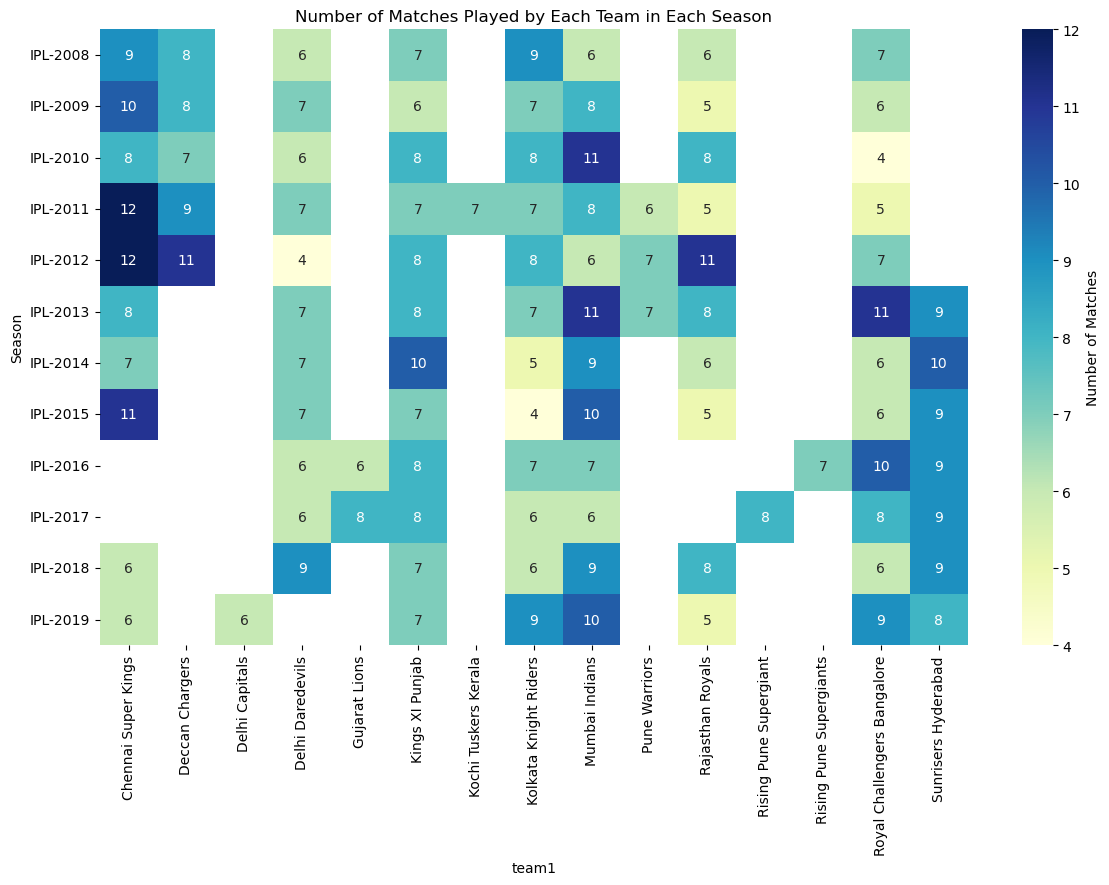

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Season' and 'team1' are columns in your DataFrame
heatmap_data = data.groupby(['Season', 'team1']).size().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Matches'})
plt.title('Number of Matches Played by Each Team in Each Season')
plt.show()


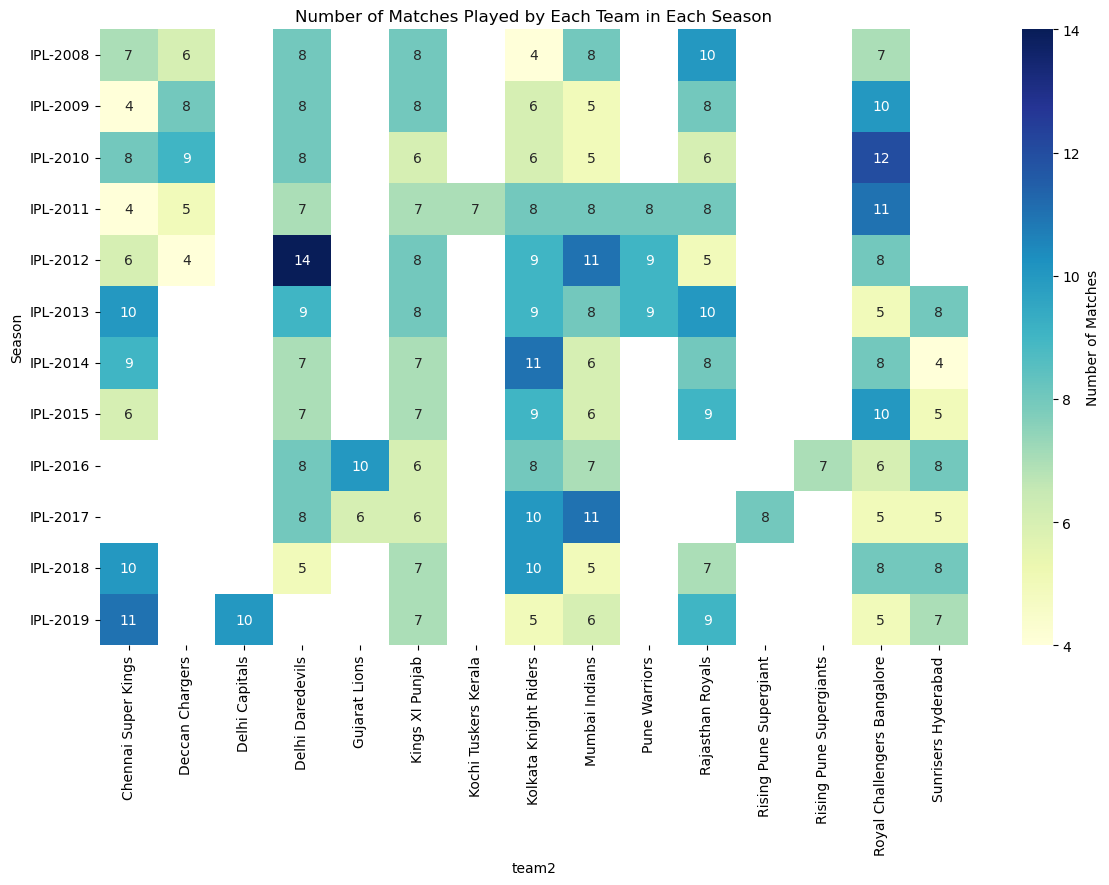

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Season' and 'team1' are columns in your DataFrame
heatmap_data = data.groupby(['Season', 'team2']).size().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Matches'})
plt.title('Number of Matches Played by Each Team in Each Season')
plt.show()


In [61]:
#import the libraries

import math
import numpy as np
import pickle
import streamlit as st

#SET PAGE WIDE
st.set_page_config(page_title='IPL_Score_Predictor',layout="centered")

#Get the ML model 

filename='ml_model.pkl'
model = pickle.load(open(filename,'rb'))

#Title of the page with CSS

st.markdown("<h1 style='text-align: center; color: white;'> IPL Score Predictor 2022 </h1>", unsafe_allow_html=True)

#Add background image

st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://4.bp.blogspot.com/-F6aZF5PMwBQ/Wrj5h204qxI/AAAAAAAABao/4QLn48RP3x0P8Ry0CcktxilJqRfv1IfcACLcBGAs/s1600/GURU%2BEDITZ%2Bbackground.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

#Add description

with st.expander("Description"):
    st.info("""A Simple ML Model to predict IPL Scores between teams in an ongoing match. To make sure the model results accurate score and some reliability the minimum no. of current overs considered is greater than 5 overs.
    
 """)

# SELECT THE BATTING TEAM


batting_team= st.selectbox('Select the Batting Team ',('Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab','Kolkata Knight Riders','Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad'))

prediction_array = []
  # Batting Team
if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]




#SELECT BOWLING TEAM

bowling_team = st.selectbox('Select the Bowling Team ',('Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab','Kolkata Knight Riders','Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad'))
if bowling_team==batting_team:
    st.error('Bowling and Batting teams should be different')
# Bowling Team
if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  

col1, col2 = st.columns(2)

#Enter the Current Ongoing Over
with col1:
    overs = st.number_input('Enter the Current Over',min_value=5.1,max_value=19.5,value=5.1,step=0.1)
    if overs-math.floor(overs)>0.5:
        st.error('Please enter valid over input as one over only contains 6 balls')
with col2:
#Enter Current Run
    runs = st.number_input('Enter Current runs',min_value=0,max_value=354,step=1,format='%i')


#Wickets Taken till now
wickets =st.slider('Enter Wickets fallen till now',0,9)
wickets=int(wickets)

col3, col4 = st.columns(2)

with col3:
#Runs in last 5 over
    runs_in_prev_5 = st.number_input('Runs scored in the last 5 overs',min_value=0,max_value=runs,step=1,format='%i')

with col4:
#Wickets in last 5 over
    wickets_in_prev_5 = st.number_input('Wickets taken in the last 5 overs',min_value=0,max_value=wickets,step=1,format='%i')

#Get all the data for predicting

prediction_array = prediction_array + [runs, wickets, overs, runs_in_prev_5,wickets_in_prev_5]
prediction_array = np.array([prediction_array])
predict = model.predict(prediction_array)


if st.button('Predict Score'):
    #Call the ML Model
    my_prediction = int(round(predict[0]))
    
    #Display the predicted Score Range
    x=f'PREDICTED MATCH SCORE : {my_prediction-5} to {my_prediction+5}' 
    st.success(x)
   

2024-02-26 22:10:05.105 
  command:

    streamlit run C:\Users\Sri Krishna\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-02-26 22:10:05.109 Session state does not function when running a script without `streamlit run`
C:\Users\Sri Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [62]:
# Import the libraries
import math
import numpy as np
import pickle
import streamlit as st

# SET PAGE WIDE
st.set_page_config(page_title='IPL_Score_Predictor', layout="centered")

# Get the ML model
filename = 'ml_model.pkl'
model = pickle.load(open(filename, 'rb'))

# Title of the page with CSS
st.markdown("<h1 style='text-align: center; color: white;'> IPL Score Predictor 2022 </h1>", unsafe_allow_html=True)

# Add background image
st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url("https://4.bp.blogspot.com/-F6aZF5PMwBQ/Wrj5h204qxI/AAAAAAAABao/4QLn48RP3x0P8Ry0CcktxilJqRfv1IfcACLcBGAs/s1600/GURU%2BEDITZ%2Bbackground.jpg");
        background-attachment: fixed;
        background-size: cover
    }}
    </style>
    """,
    unsafe_allow_html=True
)

# Add description
with st.expander("Description"):
    st.info("""A Simple ML Model to predict IPL Scores between teams in an ongoing match. To make sure the model results in accurate scores and some reliability, the minimum number of current overs considered is greater than 5 overs.""")

# SELECT THE BATTING TEAM
batting_team = st.selectbox('Select the Batting Team ', ('Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'))

prediction_array = []
# Batting Team
# ... (rest of the code remains the same)

# SELECT BOWLING TEAM
bowling_team = st.selectbox('Select the Bowling Team ', ('Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'))
# ... (rest of the code remains the same)

# Enter the Current Ongoing Over
# ... (rest of the code remains the same)

# Enter Current Run
# ... (rest of the code remains the same)

# Wickets Taken till now
# ... (rest of the code remains the same)

# Runs in last 5 over
# ... (rest of the code remains the same)

# Wickets in last 5 over
# ... (rest of the code remains the same)

# Get all the data for predicting
# ... (rest of the code remains the same)

# Call the ML Model
my_prediction = int(round(predict[0]))

# Display the predicted Score Range
x = f'PREDICTED MATCH SCORE : {my_prediction-5} to {my_prediction+5}'
st.success(x)


DeltaGenerator()

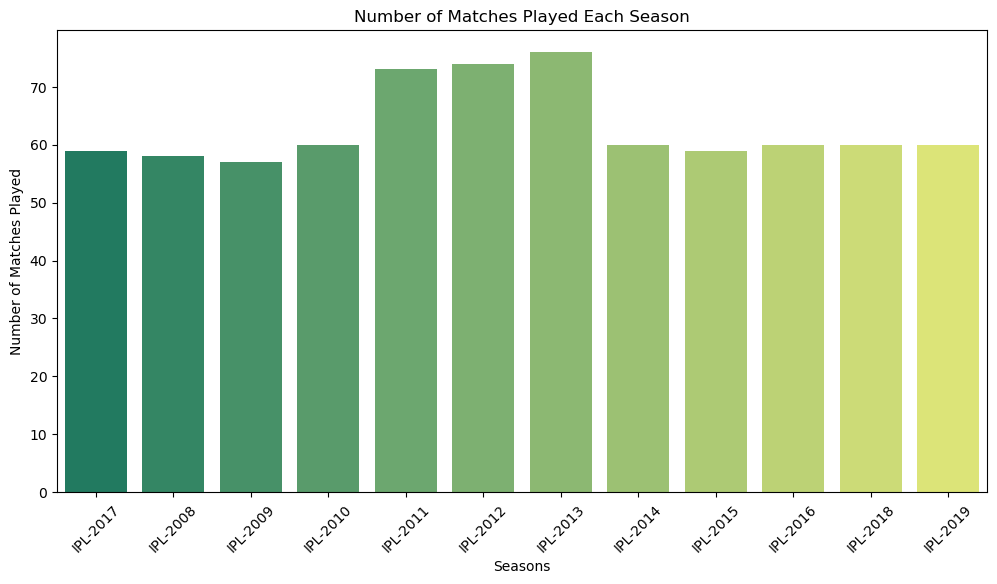

In [63]:
# Seasonal Trends
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', data=data, palette='summer')
plt.xlabel('Seasons')
plt.ylabel('Number of Matches Played')
plt.title('Number of Matches Played Each Season')
plt.xticks(rotation=45)
plt.show()